In [1]:
import os
import numpy as np
import pandas as pd
import time
import random
from tqdm import tqdm
from sklearn import preprocessing
import math
import matplotlib
import matplotlib.pyplot as plt
import csv

In [2]:
grid_size = 100 # pixels, bigger than 0 and int
total_num_nodes = 20 # bigger than 0 and int
num_activate_nodes = 2 # must be even, int
num_inactivate_nodes = total_num_nodes - num_activate_nodes
nodes_generate_model = 'uniform' # uniform, gauss, random
paired_nodes = np.array([[8,12],[2,18]])
aware_range = 20
ER_cone_coverage = 30 # degree
ER_radius = 1
ER_cone_length = 10
ER_init_angle = 0 # degree 

In [3]:
def all_nodes_position(nums, maxsize, model_flag):
    if model_flag == 'random':
        return np.random.randint(maxsize, size=(nums, 2))
    if model_flag == 'uniform':
        return (maxsize * (np.random.random_sample((nums, 2)))).astype(int)
    if model_flag == 'gauss':
        return np.random.normal(maxsize/2, maxsize/7, size=(nums, 2)).astype(int) # mu set to /7 to make sure all int bigger than 0
    else:
        return "error: invalid nodes generate model!"

In [4]:
# xlim, ylim, rank, status(Tx/Rx), upstream, downstream, destination
def sort_nodes(nodes, nums):
    rank = [*range(0, nums, 1)]
    zero = [0] * nums
    new_nodes = np.insert(nodes, 2, rank, axis=1)
    new_nodes = np.insert(new_nodes, 3, zero, axis=1)
    new_nodes = np.insert(new_nodes, 4, zero, axis=1)
    new_nodes = np.insert(new_nodes, 4, zero, axis=1)
    new_nodes = np.insert(new_nodes, 4, zero, axis=1)
    return new_nodes

In [5]:
def nodes_activate(node, order, status, up, down, des):
    node[order][3] = status # initial Rx
    node[order][4] = up
    node[order][5] = down
    node[order][6] = des
    return node

In [6]:
def ER_area(radius, coverage, angle, length, position, rank, grid_map):
    x = position[rank][0]
    y = position[rank][1]
    # radius generation
    for a in range(x-radius,x+radius+1):
        if a < 0 or a >= grid_map.shape[0]: continue
        for b in range(y-radius,y+radius+1):
            if b < 0 or b >= grid_map.shape[1]: continue
            # See grip_map ocupied or not
            if grid_map[a][b] != 1 and 5:
                grid_map[a][b] = 3 # red for ER

    # cone generation
    for c in range(2,length+2):
        height = c*math.tan(math.degrees(angle/2))
        if height - 0.5 >= int(height):
            
    
    return grid_map

In [7]:
def upstream_node_info(node, order):
    return 

In [8]:
def downstream_node_info(node, order):
    return 

In [9]:
def draw_network(grid_map):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
#     optional_background_color = ['whitesmoke','navajowhite','orange','orangered','darkred']
    optional_background_color = ['whitesmoke','green','yellow','red','darkred','black']
    total_color_number = len(optional_background_color)
    for row_number in range(grid_map.shape[0]):
        for col_number in range(grid_map.shape[1]):
            back_ground_vlaue = grid_map[row_number][col_number]
            use_color = optional_background_color[int(back_ground_vlaue)]
            x_corner = row_number
            y_corner = col_number
            rect = matplotlib.patches.Rectangle((x_corner,y_corner), 1, 1, facecolor=use_color, edgecolor = 'black', linewidth = 0.1)
            ax.add_patch(rect)
    plt.xlim(0, grid_map.shape[0])
    plt.ylim(0, grid_map.shape[1])
    plt.show()

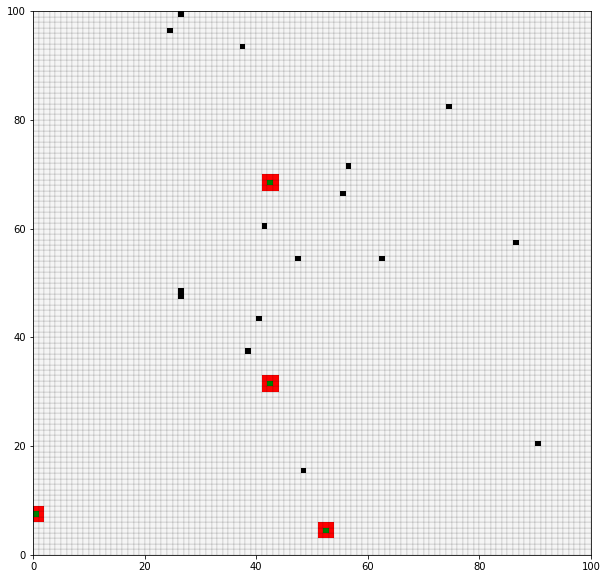

x, y, rank, status, upstream, downstream, destination
[[24 96  0  0  0  0  0]
 [38 37  1  0  0  0  0]
 [42 68  2  1 16 14 18]
 [56 71  3  0  0  0  0]
 [90 20  4  0  0  0  0]
 [48 15  5  0  0  0  0]
 [55 66  6  0  0  0  0]
 [62 54  7  0  0  0  0]
 [52  4  8  1 16 14 12]
 [26 48  9  0  0  0  0]
 [26 99 10  0  0  0  0]
 [86 57 11  0  0  0  0]
 [ 0  7 12  2 17  9  8]
 [26 47 13  0  0  0  0]
 [37 93 14  0  0  0  0]
 [47 54 15  0  0  0  0]
 [40 43 16  0  0  0  0]
 [41 60 17  0  0  0  0]
 [42 31 18  2 17  9  2]
 [74 82 19  0  0  0  0]]


In [10]:
# ENV INITIALIZATION
grid_array = np.zeros([grid_size,grid_size])
nodes_position = all_nodes_position(total_num_nodes, grid_size, nodes_generate_model)
# sorted and ready nodes
# [xlim, ylim, rank, status(Tx/Rx), upstream, downstream, destination]
# status 0-inactivate 1-Tx 2-Rx
nodes_position = sort_nodes(nodes_position, total_num_nodes)
grid_array[nodes_position[:,0],nodes_position[:,1]] = 5 # black nodes
# activate_nodes
for [i,j] in paired_nodes:
    nodes_position = nodes_activate(nodes_position, i, 1, 16, 14, j)
    nodes_position = nodes_activate(nodes_position, j, 2, 17, 9, i)
#     nodes_position = nodes_activate(nodes_position, i-1, 1, upstream_node_info(nodes_position, i-1), downstream_node_info(nodes_position, i-1), j)
#     nodes_position = nodes_activate(nodes_position, j-1, 2, upstream_node_info(nodes_position, j-1), downstream_node_info(nodes_position, j-1), i)
    x_position = [nodes_position[i, 0], nodes_position[j, 0]]
    y_position = [nodes_position[i, 1], nodes_position[j, 1]]
    grid_array[x_position[0],y_position[0]] = 1 # green activate
    grid_array[x_position[1],y_position[1]] = 1
    grid_array = ER_area(ER_radius, ER_cone_coverage, ER_init_angle, ER_cone_length, nodes_position, i, grid_array)
    grid_array = ER_area(ER_radius, ER_cone_coverage, ER_init_angle, ER_cone_length, nodes_position, j, grid_array)

# print(grid_array)
draw_network(grid_array)
print('x, y, rank, status, upstream, downstream, destination')
print(nodes_position)

